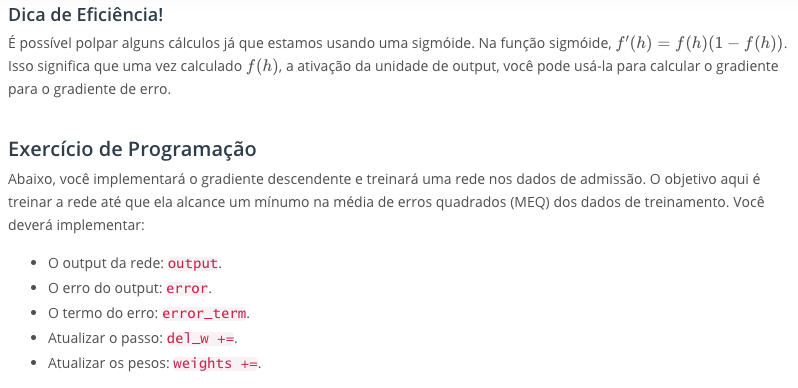

## Preparando os Dados

No CSV temos 4 tipos diferentes de dados, porém __eles não possuem relação entre si__, então __é preciso limpar__ os dados. Para __“categorizar”__ os dados criou-se uma tabela onde inicialmente relacionou-se os dados a seu rank (se o dado X pertence ao rank 3, ele terá 0 nas outras colunas e 1 na coluna 3):
￼
Isso se deu através do uso de [__variávels dummy__](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)(rank_1; rank_2; rank_3; rank_4).
Também precisamos __normalizar os valores dos resultados do GRE e do GPA__, o que __significa escalonar esses valores de modo que eles possuam média zero e desvio padrão igual a 1__. Isso é necessário porque a função sigmóide achata inputs muito grandes e inputs muito pequenos: __Gradiente de inputs muito pequenos e grandes é zero__.
Uma vez que o GRE e o GPA possuem valores relativamente altos, temos que ser cuidadosos com o modo como inicializaremos os pesos ou então os passos do gradiente descendente cessarão e a rede não aprenderá. Ao invés disso, se normalizarmos os dados, podemos inicializar os pesos facilmente e dormir em paz.

Conclusão: temos seis variáveis de entrada: gre, gpa e as quatro variáveis dummy de rank.

In [12]:
import os
import numpy as np
import pandas as pd

admissions = pd.read_csv(os.getcwd() + '/2-13-binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
# data, test_data = data.ix[sample], data.drop(sample) # DEPRECATED (cut from Udacity)
data, test_data = data.loc[sample], data.drop(sample) # New Way

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

In [14]:
# gradient.py
import numpy as np
# not neces
# from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters (TEST CHANGING IT!!)
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output

        # TODO: Calculate the output
        output = sigmoid(np.dot(x, weights)) # DONE: the output is the sigmoid result

        # TODO: Calculate the error
        error = y - output # DONE: output is the y^(y heat)

        # TODO: Calculate the error term
        error_term = error * output * (1 - output) # DONE: just use the output stored value, insted create sigmoid_prime function  

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        del_w += error_term * x # DONE: error_term * f(h) received from features.values

    # TODO: Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.26276093849966364
Train loss:  0.20928619409324895
Train loss:  0.20084292908073417
Train loss:  0.19862156475527884
Train loss:  0.19779851396686018
Train loss:  0.19742577912189863
Train loss:  0.19723507746241065
Train loss:  0.19712945625092465
Train loss:  0.19706766341315074
Train loss:  0.19703005801777368
Prediction accuracy: 0.725
